In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import random

In [8]:
df = pd.read_csv('/content/df_chi2.csv')

In [9]:
df.head()

,tenure_0-5,account_Contract_MONTH-TO-MONTH,account_Contract_TWO YEAR,account_charges_0-500,Churn
0,0,0,0,0,0
1,0,1,0,0,0
2,1,1,0,1,1
3,0,1,0,0,1
4,1,1,0,1,1


# <h1> <font color='red'>DESAFIO:</font> Verificar se a variável target está balanceada.

Verifique se o conjunto de dados está balanceado. No caso do desbalanceamento, escolha um método para tratá-lo. O artigo “Lidando com o desbalanceamento de dados“ oferece informações a respeito das formas de trabalhar com dados desbalanceados.

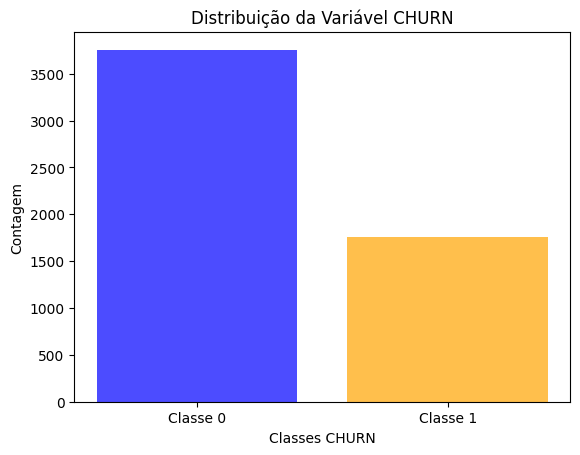

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import random

# Contagem das classes da variável 'Rotatividade'
class_count = df['Churn'].value_counts().sort_index()

# Plotando o gráfico de barras
plt.bar(class_count.index, class_count.values, color=['blue', 'orange'], alpha=0.7)
plt.xlabel('Classes CHURN')
plt.ylabel('Contagem')
plt.title('Distribuição da Variável CHURN')
plt.xticks(class_count.index, ['Classe 0', 'Classe 1'])
plt.show()


In [11]:
df['Churn'].value_counts().sort_index()

0    3756
1    1756
Name: Churn, dtype: int64

In [12]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Suponhamos que 'X' são suas características e 'y' são suas etiquetas (classes)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Instanciando o objeto RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicando o balanceamento
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convertendo os dados balanceados de volta para um DataFrame, se necessário
X_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])
y_resampled = pd.Series(y_resampled, name='Churn')

# Cria um novo DataFrame com os dados balanceados.
df_balanceado = pd.concat([X_resampled, y_resampled], axis=1)

# Agora, 'X_resampled' e 'y_resampled' são suas características e etiquetas balanceadas.


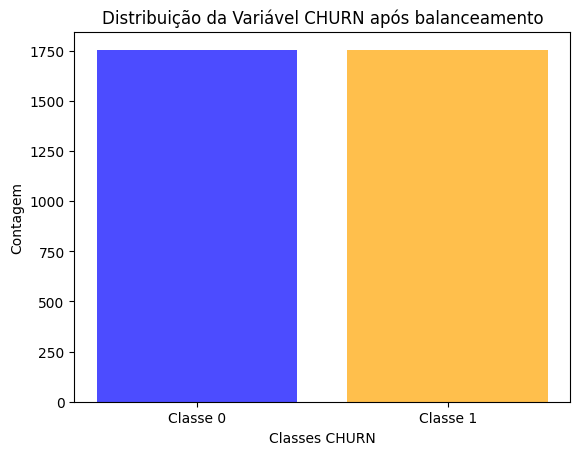

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import random

# Contagem das classes da variável 'Rotatividade'
class_count = df_balanceado['Churn'].value_counts().sort_index()

# Plotando o gráfico de barras
plt.bar(class_count.index, class_count.values, color=['blue', 'orange'], alpha=0.7)
plt.xlabel('Classes CHURN')
plt.ylabel('Contagem')
plt.title('Distribuição da Variável CHURN após balanceamento')
plt.xticks(class_count.index, ['Classe 0', 'Classe 1'])
plt.show()


# <h1> <font color='blue'>EXTRA:</font> Qual métrica otimizar?

Analise o problema que você está resolvendo e com base nos conteúdos aprendidos escolha a métrica de classificação ideal para ser otimizada.

Recall

# <h1> <font color='red'>DESAFIO:</font> Criar dois ou mais modelos de Machine Learning.

Para melhorar o projeto é aconselhável que você implemente pelo menos dois modelos de machine learning e realize experimentações para avaliar qual modelo melhor se ajusta aos dados de acordo com as métricas de classificação. A fase de experimentação é crucial para o processo e pode te ajudar alcançar melhores resultados.

Dica: que tal experimentar diferentes modelos com metodologias distintas? Por exemplo, modelos baseados em bagging e modelos que utilizam boosting. Dessa forma, você pode avaliar qual abordagem funciona melhor para o seu caso.

Modelos:

* Random Forest
* XGBoost
* Regressão Logística

##<h1>Analisando o desempenho dos modelos no conjunto de dados com todas as features

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

df_completo = pd.read_csv('/content/df_completo.csv')

# Suponhamos que 'X' são suas características e 'y' são suas etiquetas (classes)
X = df_completo.drop('Churn', axis=1)
y = df_completo['Churn']

# Criar os objetos de classificação
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_xgb = xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
clf_lr = LogisticRegression(max_iter=1000, random_state=42)

# Executar validação cruzada no conjunto de dados de treinamento
scores_rf_completo = cross_val_score(clf_rf, X, y, cv=5, scoring='recall')
scores_xgb_completo = cross_val_score(clf_xgb, X, y, cv=5, scoring='recall')
scores_lr_completo = cross_val_score(clf_lr, X, y, cv=5, scoring='recall')

In [15]:
print("Recall obtido em cada iteração da validação cruzada com Random Forest:", scores_rf_completo)
print("Recall médio na validação cruzada com Random Forest:", scores_rf_completo.mean())

Recall obtido em cada iteração da validação cruzada com Random Forest: [0.48717949 0.47727273 0.5014245  0.52136752 0.51851852]
Recall médio na validação cruzada com Random Forest: 0.5011525511525512


In [16]:
print("Recall obtido em cada iteração da validação cruzada com XGBoost:", scores_xgb_completo)
print("Recall médio na validação cruzada com XGBoost:", scores_xgb_completo.mean())

Recall obtido em cada iteração da validação cruzada com XGBoost: [0.54415954 0.50284091 0.57264957 0.54415954 0.55840456]
Recall médio na validação cruzada com XGBoost: 0.5444428256928256


In [17]:
print("Recall obtido em cada iteração da validação cruzada com Regressão Logística:", scores_lr_completo)
print("Recall médio na validação cruzada com Regressão Logística:", scores_lr_completo.mean())

Recall obtido em cada iteração da validação cruzada com Regressão Logística: [0.53846154 0.53693182 0.54700855 0.56125356 0.58974359]
Recall médio na validação cruzada com Regressão Logística: 0.554679810929811


##<h1>Analisando o desempenho dos modelos no conjunto de dados com as features selecionadas pelo método Chi2, mas com os dados desbalanceados.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Suponhamos que 'X' são suas características e 'y' são suas etiquetas (classes)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Criar os objetos de classificação
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_xgb = xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
clf_lr = LogisticRegression(max_iter=1000, random_state=42)

# Executar validação cruzada no conjunto de dados de treinamento
scores_rf_desb = cross_val_score(clf_rf, X, y, cv=5, scoring='recall')
scores_xgb_desb = cross_val_score(clf_xgb, X, y, cv=5, scoring='recall')
scores_lr_desb = cross_val_score(clf_lr, X, y, cv=5, scoring='recall')

In [19]:
print("Recall obtido em cada iteração da validação cruzada com Random Forest:", scores_rf_desb)
print("Recall médio na validação cruzada com Random Forest:", scores_rf_desb.mean())

Recall obtido em cada iteração da validação cruzada com Random Forest: [0.33618234 0.33238636 0.37321937 0.33903134 0.34472934]
Recall médio na validação cruzada com Random Forest: 0.34510975135975136


In [20]:
print("Recall obtido em cada iteração da validação cruzada com XGBoost:", scores_xgb_desb)
print("Recall médio na validação cruzada com XGBoost:", scores_xgb_desb.mean())

Recall obtido em cada iteração da validação cruzada com XGBoost: [0.33618234 0.33238636 0.37321937 0.33903134 0.34472934]
Recall médio na validação cruzada com XGBoost: 0.34510975135975136


In [21]:
print("Recall obtido em cada iteração da validação cruzada com Regressão Logística:", scores_lr_desb)
print("Recall médio na validação cruzada com Regressão Logística:", scores_lr_desb.mean())

Recall obtido em cada iteração da validação cruzada com Regressão Logística: [0.33618234 0.33238636 0.37321937 0.33903134 0.34472934]
Recall médio na validação cruzada com Regressão Logística: 0.34510975135975136


##<h1>Analisando o desempenho dos modelos no conjunto de dados com as features selecionadas pelo método Chi2 e com os dados balanceados.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Suponhamos que 'X' são suas características e 'y' são suas etiquetas (classes)
X = df_balanceado.drop('Churn', axis=1)
y = df_balanceado['Churn']

# Criar os objetos de classificação
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_xgb = xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
clf_lr = LogisticRegression(max_iter=1000, random_state=42)

# Executar validação cruzada no conjunto de dados de treinamento
scores_rf_bal = cross_val_score(clf_rf, X, y, cv=5, scoring='recall')
scores_xgb_bal = cross_val_score(clf_xgb, X, y, cv=5, scoring='recall')
scores_lr_bal = cross_val_score(clf_lr, X, y, cv=5, scoring='recall')

In [23]:
print("Recall obtido em cada iteração da validação cruzada com Random Forest:", scores_rf_bal)
print("Recall médio na validação cruzada com Random Forest:", scores_rf_bal.mean())

Recall obtido em cada iteração da validação cruzada com Random Forest: [0.89458689 0.84943182 0.9002849  0.88034188 0.90598291]
Recall médio na validação cruzada com Random Forest: 0.8861256798756798


In [24]:
print("Recall obtido em cada iteração da validação cruzada com XGBoost:", scores_xgb_bal)
print("Recall médio na validação cruzada com XGBoost:", scores_xgb_bal.mean())

Recall obtido em cada iteração da validação cruzada com XGBoost: [0.89458689 0.84943182 0.9002849  0.88034188 0.90598291]
Recall médio na validação cruzada com XGBoost: 0.8861256798756798


In [25]:
print("Recall obtido em cada iteração da validação cruzada com Regressão Logística:", scores_lr_bal)
print("Recall médio na validação cruzada com Regressão Logística:", scores_lr_bal.mean())

Recall obtido em cada iteração da validação cruzada com Regressão Logística: [0.89458689 0.84943182 0.9002849  0.88034188 0.90598291]
Recall médio na validação cruzada com Regressão Logística: 0.8861256798756798


#<h1>Comparando resultados

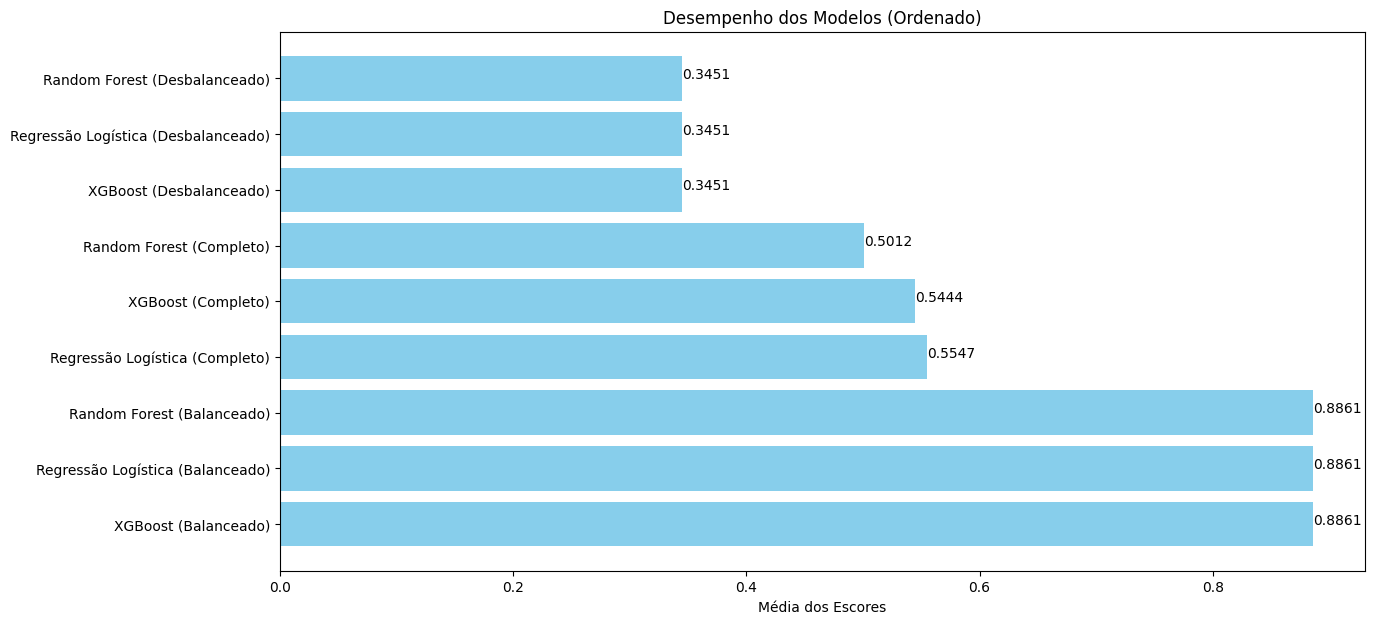

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Armazenar os resultados em uma lista
resultados = [scores_rf_bal, scores_xgb_bal, scores_lr_bal, scores_rf_desb, scores_xgb_desb, scores_lr_desb, scores_rf_completo, scores_xgb_completo, scores_lr_completo]

# Calcular a média dos resultados para cada modelo
medias = [np.mean(scores) for scores in resultados]

# Rótulos para os modelos
modelos = ['Random Forest (Balanceado)', 'XGBoost (Balanceado)', 'Regressão Logística (Balanceado)',
           'Random Forest (Desbalanceado)', 'XGBoost (Desbalanceado)', 'Regressão Logística (Desbalanceado)',
           'Random Forest (Completo)', 'XGBoost (Completo)', 'Regressão Logística (Completo)']

# Ordenar os resultados do maior para o menor e os rótulos correspondentes
medias_ordenadas, modelos_ordenados = zip(*sorted(zip(medias, modelos), reverse=True))

# Criar o gráfico de barras ordenado
plt.figure(figsize=(14, 7))
plt.barh(modelos_ordenados, medias_ordenadas, color='skyblue')
plt.xlabel('Média dos Escores')
plt.title('Desempenho dos Modelos (Ordenado)')

# Adicionar rótulos de texto nas barras
for index, value in enumerate(medias_ordenadas):
    plt.text(value, index, f'{value:.4f}')

plt.show()

# <h1> <font color='red'>DESAFIO:</font> Escolher o melhor modelo

Para escolher o melhor modelo dentre os experimentados, é necessário realizar uma análise criteriosa das métricas recebidas por cada um. É importante avaliar cuidadosamente qual métrica é a mais adequada para o problema que está sendo resolvido, a fim de determinar qual modelo é o mais indicado.

Os 3 modelos tiveram um resultado excelente no conjunto de dados balanceado.

# <h1> <font color='red'>DESAFIO:</font> Otimizar o melhor modelo!

Ótimo, você já possui um modelo de machine learning! Para melhorá-lo ainda mais, sugiro que faça a otimização dos hiperparâmetros do modelo. Isso pode ajudar a maximizar o desempenho e a precisão do seu modelo.

In [40]:
from sklearn.model_selection import GridSearchCV

# Suponhamos que 'X' são suas características e 'y' são suas etiquetas (classes)
X = df_balanceado.drop('Churn', axis=1)
y = df_balanceado['Churn']

# Parâmetros que você gostaria de otimizar para cada modelo
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Criar os objetos GridSearchCV
grid_search_rf = GridSearchCV(estimator=clf_rf, param_grid=param_grid_rf,
                              cv=5, scoring='recall', n_jobs=-1, verbose=2)

grid_search_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid_xgb,
                               cv=5, scoring='recall', n_jobs=-1, verbose=2)

grid_search_lr = GridSearchCV(estimator=clf_lr, param_grid=param_grid_lr,
                              cv=5, scoring='recall', n_jobs=-1, verbose=2)


Hiperparâmetros Random Forest

In [41]:
# Treinar o modelo RandomForest com GridSearchCV
grid_search_rf.fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=2)

In [42]:
# Para o modelo Random Forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

In [43]:
print(best_params_rf)
print(best_score_rf)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
0.8861256798756798


Hiperparâmetros XGBoost

In [44]:
# Treinar o modelo XGBoost com GridSearchCV
grid_search_xgb.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=2)

In [46]:
# Para o modelo XGBoost
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

In [47]:
print(best_params_xgb)
print(best_score_xgb)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.8861256798756798


Hiperparâmetros Regressão Logística

In [49]:
# Grid separado para o solver lbfgs e newton-cg que só suportam a penalidade l2
param_grid_lr_l2 = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs']
}

# Grid separado para o solver liblinear que suporta as penalidades l1 e l2
param_grid_lr_l1_l2 = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Criar os objetos GridSearchCV
grid_search_lr_l2 = GridSearchCV(estimator=clf_lr, param_grid=param_grid_lr_l2,
                                 cv=5, scoring='recall', n_jobs=-1, verbose=2)
grid_search_lr_l1_l2 = GridSearchCV(estimator=clf_lr, param_grid=param_grid_lr_l1_l2,
                                    cv=5, scoring='recall', n_jobs=-1, verbose=2)

# Treinar os modelos
grid_search_lr_l2.fit(X, y)
grid_search_lr_l1_l2.fit(X, y)

# Obter os melhores parâmetros e scores
best_params_lr_l2 = grid_search_lr_l2.best_params_
best_score_lr_l2 = grid_search_lr_l2.best_score_

best_params_lr_l1_l2 = grid_search_lr_l1_l2.best_params_
best_score_lr_l1_l2 = grid_search_lr_l1_l2.best_score_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [50]:
print(best_params_lr_l2)
print(best_score_lr_l2)
print(best_params_lr_l1_l2)
print(best_score_lr_l1_l2)

{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.8866938616938617
{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.8889714452214452


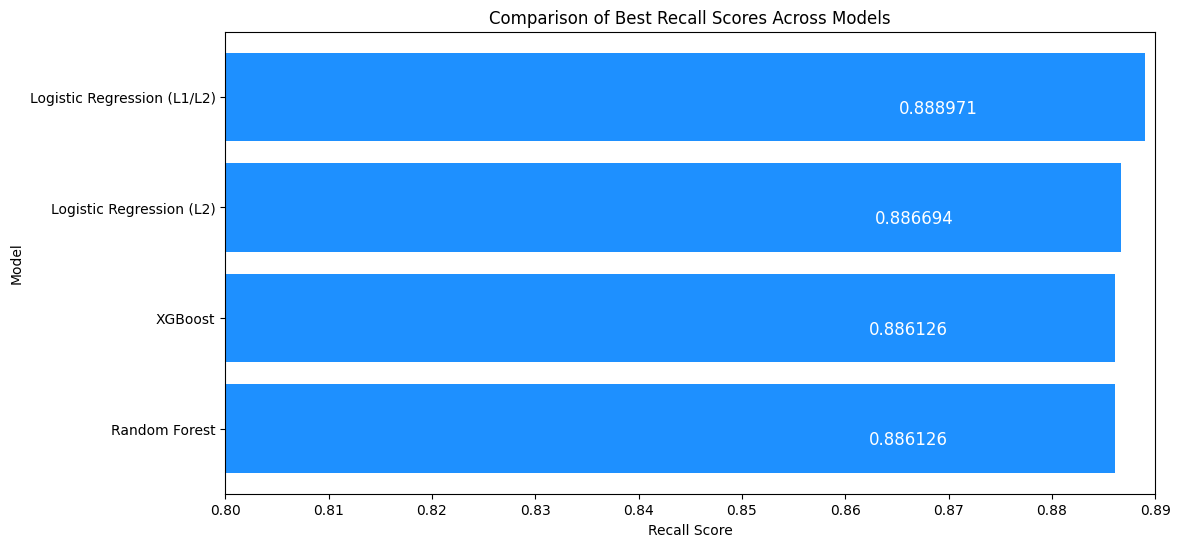

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Preparar os dados para o gráfico
labels = ['Random Forest', 'XGBoost', 'Logistic Regression (L2)', 'Logistic Regression (L1/L2)']
scores = [best_score_rf, best_score_xgb, best_score_lr_l2, best_score_lr_l1_l2]

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.barh(labels, scores, color='dodgerblue')

# Adicionar rótulos de texto nas barras
for bar in bars:
    plt.text(bar.get_width() - 0.02, bar.get_y() + bar.get_height()/2 - 0.1,
             f"{bar.get_width():.6f}", va='center', ha='center', color='white', fontsize=12)

# Adicionar títulos e rótulos
plt.xlabel('Recall Score')
plt.ylabel('Model')
plt.title('Comparison of Best Recall Scores Across Models')
plt.xlim([0.8 , 0.89])  # Definindo o limite do eixo x para começar em 0.8

# Mostrar o gráfico
plt.show()

# <h1> <font color='blue'>EXTRA:</font> Verificar quais os hiperparâmetros escolhidos.

Uma boa prática após a otimização é verificar os hiperparâmetros utilizados no melhor modelo. Pesquise na documentação algum método que ajude a conferir os hiperparâmetros do modelo.

In [70]:
print(best_params_lr_l1_l2)
print(best_score_lr_l1_l2)

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.8889714452214452


# <h1> <font color='blue'>EXTRA:</font> Salvar o melhor modelo!

Salve o modelo de machine learning otimizado. Isso permitirá que o modelo seja reutilizado posteriormente para realizar previsões precisas em novos conjuntos de dados. A biblioteca pickle pode ajudar nessa tarefa!


In [73]:
best_lr_model = grid_search_lr.best_estimator_
predictions_lr = best_lr_model.predict(X)

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Avaliação com validação cruzada
cv_scores = cross_val_score(best_lr_model, X, y, cv=5, scoring='recall')

print("Recall scores com validação cruzada: ", cv_scores)
print("Média dos scores de recall: ", np.mean(cv_scores))


Recall scores com validação cruzada:  [0.89458689 0.85511364 0.9031339  0.88319088 0.90883191]
Média dos scores de recall:  0.8889714452214452


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

# Suponhamos que 'X' são suas características e 'y' são suas etiquetas (classes)
X = df_balanceado.drop('Churn', axis=1)
y = df_balanceado['Churn']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo otimizado no conjunto de treinamento
best_lr_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = best_lr_model.predict(X_test)

# Avaliar o modelo no conjunto de teste
print("Recall no conjunto de teste: ", recall_score(y_test, y_pred))

Recall no conjunto de teste:  0.896969696969697


In [80]:
import pickle

# Salvar o melhor modelo de Regressão Logística utilizando pickle
with open('best_lr_model.pkl', 'wb') as model_file:
    pickle.dump(best_lr_model, model_file)

# Carregar o modelo salvo
with open('best_lr_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Imprimir o modelo
print(loaded_model)

LogisticRegression(C=0.001, max_iter=1000, random_state=42, solver='liblinear')
